# 0.0 Imports

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
import json

import pickle


import matplotlib.pyplot as plt
%matplotlib inline

## 0.1 Loading Dataset

In [24]:
df_raw = pd.read_csv('../data/raw/train.csv')

In [25]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data Description

In [26]:
df_raw.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [27]:
df1 = df_raw.copy()

In [28]:
df1.columns = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

In [29]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1 Data Dimension

In [30]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))


Number of rows: 381109
Number of columns: 12


## 1.2 Data Types

In [31]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3 Check NA

In [32]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4 Data Descriptive

In [33]:
num_attributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64, datetime64[ns]'])


In [34]:
# Central Tendency = Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()- x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [35]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0 Feature Engineering

In [36]:
df2 = df1.copy()

In [37]:
# Vehicle Age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_years' if x == '1-2 Year' else 'below_1_year')

#Vehicle Damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3.0 Data Filtering

In [38]:
df3 = df2.copy()

# 4.0 EDA

In [39]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### Age

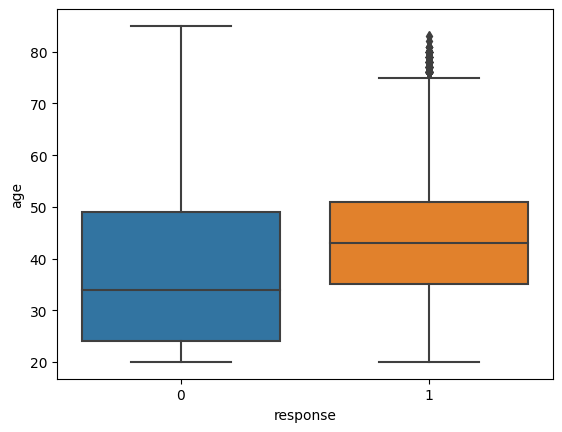

In [40]:
sns.boxplot(x='response', y='age', data=df4);

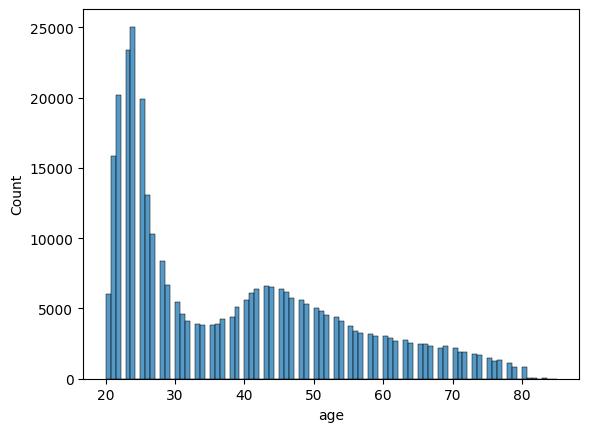

In [41]:
aux00 = df4.loc[df4['response']==0,'age']
sns.histplot(aux00);

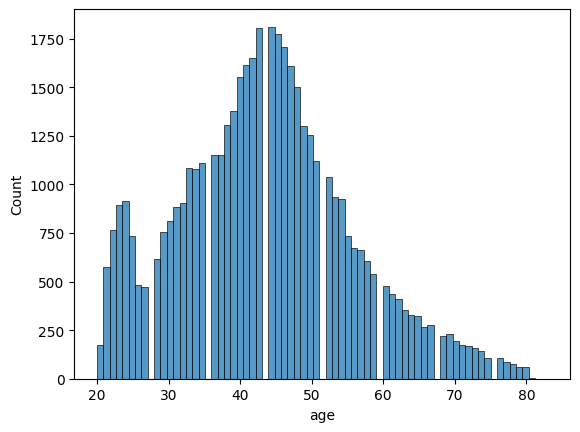

In [42]:
aux00 = df4.loc[df4['response']==1,'age']
sns.histplot(aux00);

### Annual Premium

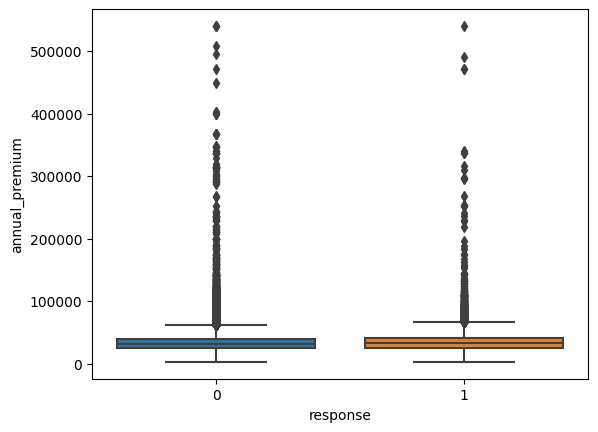

In [43]:
sns.boxplot(x='response', y='annual_premium', data=df4);

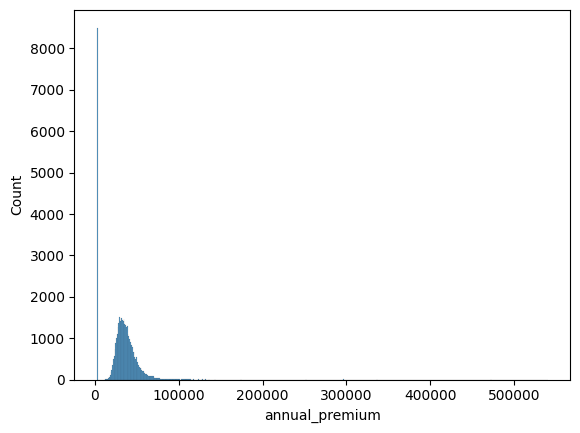

In [44]:
aux = df4.loc[df4['response']==1, 'annual_premium']
sns.histplot(aux);

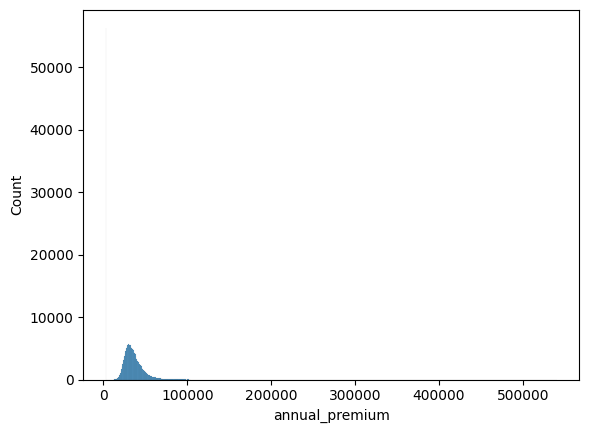

In [45]:
aux = df4.loc[df4['response']==0, 'annual_premium']
sns.histplot(aux);

In [46]:
aux = df4.loc[(df4['annual_premium']>10000) & (df4['annual_premium']<80000)]

<AxesSubplot: xlabel='annual_premium', ylabel='Count'>

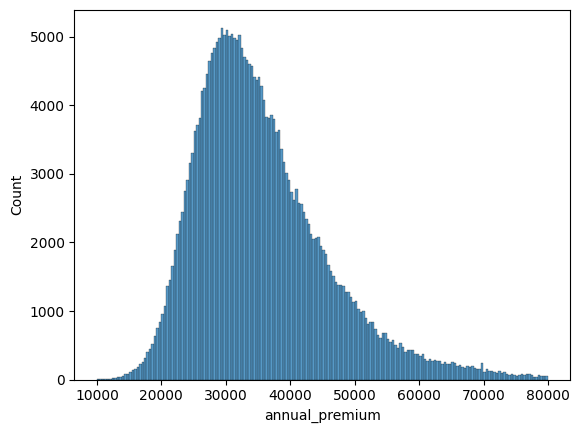

In [47]:
aux00 = aux.loc[aux['response']==0, 'annual_premium']
sns.histplot(aux00)

<AxesSubplot: xlabel='annual_premium', ylabel='Count'>

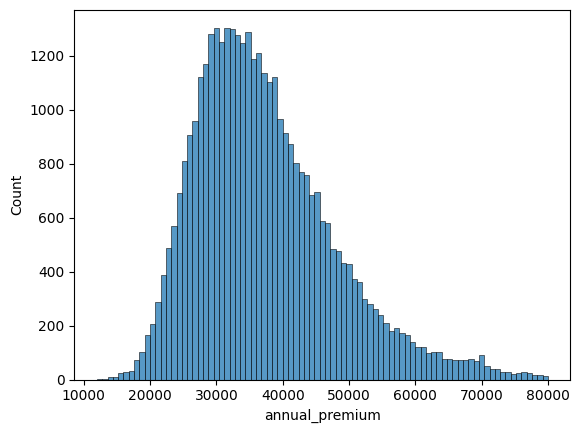

In [48]:
aux00 = aux.loc[aux['response']==1, 'annual_premium']
sns.histplot(aux00)

### Driving License

In [49]:
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()
#sns.barplot(x='response', y='driving_license', data=aux);
aux.head()

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


### Region Code

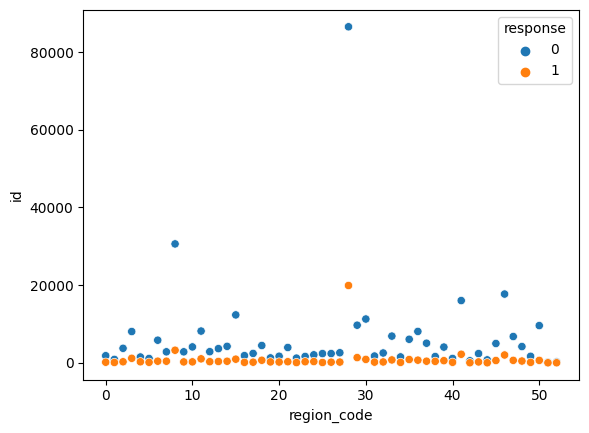

In [50]:
aux0 = df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue = 'response', data=aux0);

### Previously Insured

In [51]:
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


### Vehicle Age

In [52]:
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between_1_2_years,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_years,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


### Policy Sales Channel

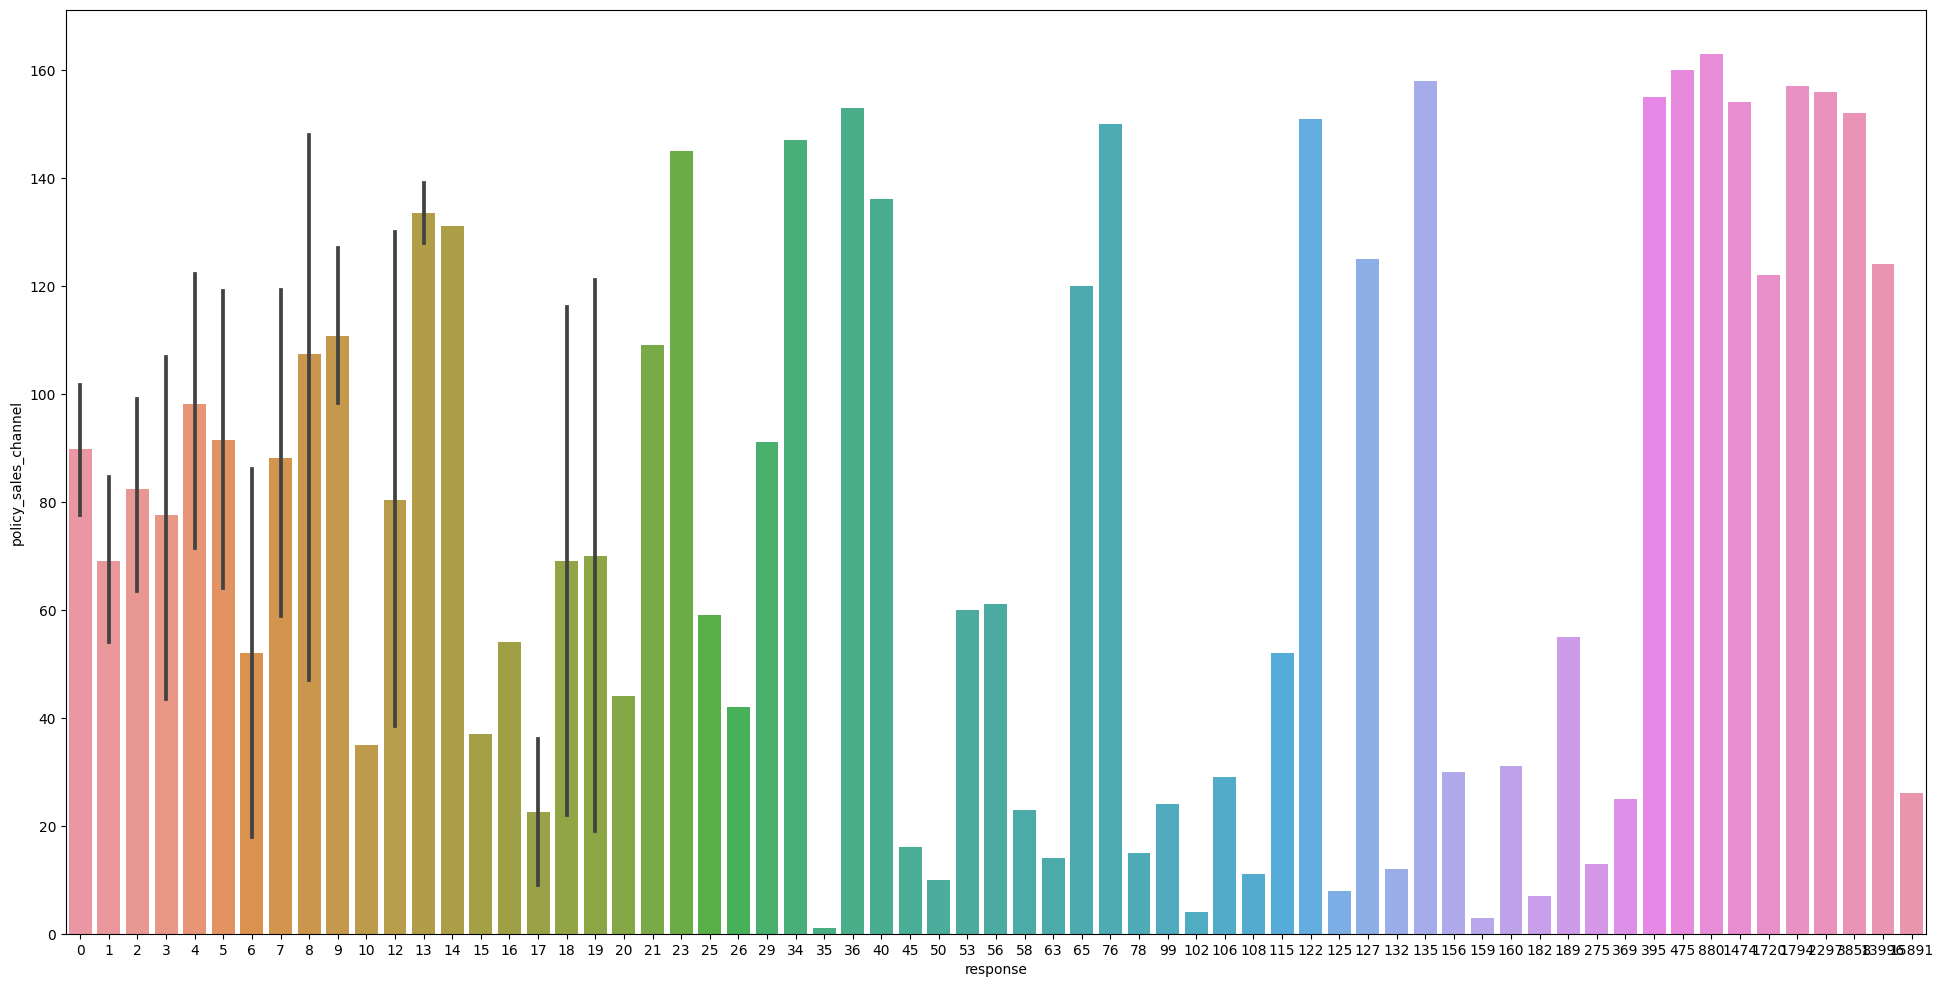

In [53]:
plt.figure(figsize=(24,12))
aux = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux);


### Vintage

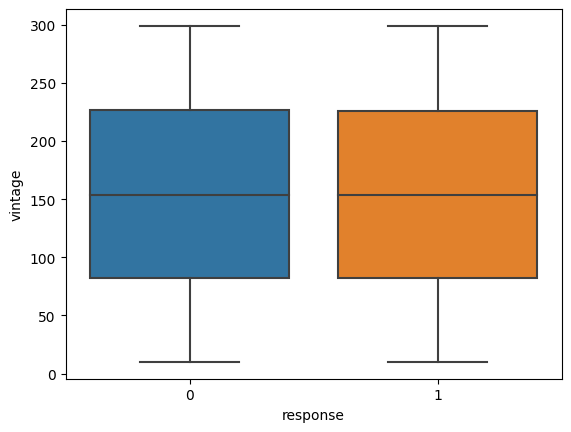

In [54]:
sns.boxplot(x='response', y='vintage', data=df4);

In [55]:
aux00 = df4.loc[df4['response']==0, 'vintage']

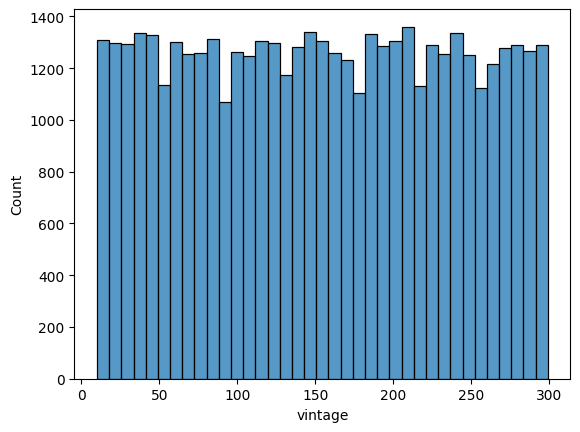

In [56]:
aux00 = df4.loc[df4['response']==1, 'vintage']
sns.histplot(aux00);

# 5.0 Data Preparation

In [57]:
df5 = df4.copy()

In [58]:
df5.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [59]:
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

df5 = pd.concat([x_train, y_train], axis=1)

In [60]:
x_validation.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
200222,200223,Female,21,1,3.0,1,below_1_year,0,20408.0,160.0,72
49766,49767,Male,55,1,15.0,0,between_1_2_years,1,37498.0,26.0,102
172201,172202,Female,41,1,3.0,0,between_1_2_years,1,2630.0,26.0,90
160713,160714,Female,26,1,11.0,0,below_1_year,0,2630.0,151.0,268
53272,53273,Male,51,1,40.0,0,between_1_2_years,1,34006.0,124.0,265


In [ ]:
df5.columns

## 5.1 Standardization

In [ ]:
ss = StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)
pickle.dump(ss, open('../src/features/annual_premium_scaler.pkl', 'wb'))

## 5.2 Rescaling

In [ ]:
# Age
mms_age = MinMaxScaler()
df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump(mms_age, open('../src/features/age_scaler.pkl', 'wb'))

# vintage
mms_vintage = MinMaxScaler()
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)
pickle.dump(mms_vintage, open('../src/features/vintage_scaler.pkl', 'wb'))


## 5.3 Encoding

In [ ]:
# gender
target_enconder_gender = df5.groupby('gender')['response'].mean()
df5.loc[:,'gender'] = df5['gender'].map(target_enconder_gender)
pickle.dump(target_enconder_gender, open('../src/features/target_encoder_gender_scaler.pkl', 'wb'))

# region_code - Target Encoding / Frequency Encoding
target_encoder_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoder_region_code)
pickle.dump(target_encoder_region_code, open('../src/features/target_encoder_region_code_scaler.pkl', 'wb'))

# vehicle_age
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])

# vehicle_damage

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)
pickle.dump(fe_policy_sales_channel, open('../src/features/fe_policy_sales_channel_scaler.pkl', 'wb'))

In [ ]:
df5.head()

## 5.4 Validation Preparing

In [ ]:
# Gender

x_validation.loc[:,'gender'] = x_validation.loc[:,'gender'].map(target_enconder_gender)

# Age

x_validation.loc[:,'age'] = mms_age.transform(x_validation[['age']].values)

# Region Code

x_validation.loc[:,'region_code'] = x_validation.loc[:,'region_code'].map(target_encoder_region_code)

# Vehicle Age

x_validation = pd.get_dummies(x_validation, prefix='vehicle_age', columns= ['vehicle_age'])

# Annual Premium

x_validation.loc[:,'annual_premium'] = ss.transform(x_validation[['annual_premium']].values)

# Policy Sales Channel

x_validation.loc[:,'policy_sales_channel'] = x_validation.loc[:,'policy_sales_channel'].map(fe_policy_sales_channel)

# Vintage

x_validation.loc[:,'vintage'] = mms_vintage.transform(x_validation[['vintage']].values)

# FIll NA

x_validation = x_validation.fillna(0)

In [ ]:
x_validation.head()

# 6.0 Feature Selection

## 6.1 BORUTA

## 6.2 Feature Importance 

In [ ]:
# model definition
RF = RandomForestClassifier( n_estimators=200, random_state=42, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
RF.fit( x_train_n, y_train_n )

In [ ]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, RF.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0 Machine Learning

In [ ]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()

## 7.1 KNN

In [ ]:
# model definition
knn_model = KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - Poder de GENERALIZACAO 
yhat_knn = knn_model.predict_proba( x_val)

In [ ]:
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn ); 

## 7.2 Logistic Regression

In [ ]:
# model definition
lr_model = LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

## 7.3 Extra Trees

In [ ]:
# model definition
et = ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 ) 

# model training
et.fit( x_train, y_train )

# model prediction
yhat_et = et.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_et);

# 8.0 Model Perfomance

In [ ]:
def precision_at_k(data, k=2000):

    # Reset Index
    data = data.reset_index(drop=True)

    # Creating ranking order
    data['ranking'] = data.index + 1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']

In [ ]:
def recall_at_k(data, k=2000):

    # Reset Index
    data = data.reset_index(drop=True)

    # Creating ranking order
    data['ranking'] = data.index + 1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']

In [ ]:
# copy data
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensy_score
df8['score'] = yhat_lr[:,1].tolist()

# Sorting clients by propesing score
df8 = df8.sort_values('score', ascending=False)

# compute precision at K
precision_at_50 = precision_at_k(df8, k=50)
print('Precision at K: {}'.format(precision_at_50))

recall_at_50 = recall_at_k(df8, k=50)
print('Recall at K:{}'.format(recall_at_50))

# 9.0 Model to Production

In [ ]:
# Save trained model

#pickle.dump( et, open( '/home/laflamebr/Documentos/repos/pa004_health_insurance_cross_sell/models/model_health_insurance.pkl', 'wb' ) )
pickle.dump( lr_model, open( '/home/laflamebr/Documentos/repos/pa004_health_insurance_cross_sell/models/model_linear_regression.pkl', 'wb' ) )

## 9.1 Health Insurance Class

In [ ]:
import pickle
import pandas as pd
import numpy as np

class HealthInsurance(object):
    
    def __init__(self):
        self.home_path = ''
        self.annual_premium_scaler =                                 pickle.load(open(self.home_path + 'paramater/annual_premium_scaler.pkl', 'rb'))
        self.age_scaler =                                            pickle.load(open(self.home_path + 'paramater/age_scaler.pkl', 'rb'))
        self.vintage_scaler =                                        pickle.load(open(self.home_path + 'paramater/vintage_scaler.pkl', 'rb'))
        self.target_encoder_gender_scaler =                          pickle.load(open(self.home_path + 'paramater/target_encoder_gender_scaler.pkl', 'rb'))
        self.target_encoder_region_code_scaler =                     pickle.load(open(self.home_path + 'paramater/target_encoder_region_code_scaler.pkl', 'rb'))
        self.fe_policy_sales_channel_scaler =                        pickle.load(open(self.home_path + 'paramater/fe_policy_sales_channel_scaler.pkl', 'rb'))       
        
    def data_cleaning(self, data):
        cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']
        
        data.columns = cols_new
        
        return data
    
    def feature_engineering(self, data):
        data['vehicle_age'] = data['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_years' if x == '1-2 Year' else 'below_1_year')

        data['vehicle_damage'] = data['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
        
        return data
        
    def data_preparation (self, data):
        # annual_premium
        data['annual_premium'] = self.annual_premium_scaler.transform(data[['annual_premium']].values)
        
        # Age
        data['age'] = self.age_scaler.transform(data[['age']].values)

        # vintage
        data['vintage'] = self.vintage_scaler.transform(data[['vintage']].values)
        
        # gender
        data.loc[:,'gender'] = data['gender'].map(self.target_encoder_gender_scaler)

        # region_code - Target Encoding / Frequency Encoding
        data.loc[:, 'region_code'] = data['region_code'].map(self.target_encoder_region_code_scaler)

        # vehicle_age
        data = pd.get_dummies(data, prefix='vehicle_age', columns=['vehicle_age'])

        # policy_sales_channel
        data.loc[:, 'policy_sales_channel'] = data['policy_sales_channel'].map(self.fe_policy_sales_channel_scaler)
        
        # Feature Selection
        cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']
        
        return data[cols_selected]
    
    def get_prediction(self, model, original_data, test_data):
        # Model Prediction
        pred = model.predict_proba(test_data)
        
        #Join prediction to original data
        original_data['score'] = pred[:, 1].tolist()
        
        return original_data.to_json(orient = 'records', date_format='iso')

## 9.2 API HANDLER

In [ ]:
import pickle
import pandas as pd
from flask import Flask, request, Response
import HealthInsurance

# loading model
path = '/home/laflamebr/Documentos/repos/pa004_health_insurance_cross_sell/'
model = pickle.load( open( path + 'models/model_linear_regression.pkl', 'rb' ) )

# initialize API
app = Flask( __name__ )

@app.route( '/healthinsurance/predict', methods=['POST'] )

def health_insurance_predict():
    test_json = request.get_json()
    
    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instantiate Rossmann class
        pipeline = HealthInsurance()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # data preparation
        df3 = pipeline.data_preparation( df2 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df3 )
        
        return df_response
    
    else:
        return Response( '{}', status=200, mimetype='application/json' )
    
if __name__ == '__main__':
    app.run( '0.0.0.0', debug=True )

## 9.3 API TESTER

In [88]:
import requests

In [89]:
df_test = x_validation
df_test['response'] = y_validation


In [90]:
df_test = df_test.sample(20)

In [91]:
df_test.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
121078,121079,Female,22,1,8.0,1,below_1_year,0,24149.0,160.0,110,0
83447,83448,Male,49,1,11.0,0,between_1_2_years,1,28837.0,26.0,124,1
343587,343588,Female,22,1,28.0,0,below_1_year,1,34087.0,152.0,63,0
132329,132330,Male,72,1,28.0,1,between_1_2_years,0,47811.0,26.0,78,0
14056,14057,Male,46,1,50.0,0,between_1_2_years,1,30226.0,124.0,288,0


In [97]:
nome_arquivo = 'dados_test.xlsx'
df_test.to_excel(nome_arquivo, index=False)

In [85]:
# convert dataframe to json
data = json.dumps( df_test.to_dict( orient='records' ) )

In [86]:
data

'[{"id": 292851, "gender": "Male", "age": 28, "driving_license": 1, "region_code": 36.0, "previously_insured": 1, "vehicle_age": "below_1_year", "vehicle_damage": 0, "annual_premium": 44587.0, "policy_sales_channel": 152.0, "vintage": 270, "response": 0}, {"id": 337593, "gender": "Female", "age": 22, "driving_license": 1, "region_code": 28.0, "previously_insured": 1, "vehicle_age": "below_1_year", "vehicle_damage": 0, "annual_premium": 24912.0, "policy_sales_channel": 152.0, "vintage": 253, "response": 0}, {"id": 222307, "gender": "Female", "age": 40, "driving_license": 1, "region_code": 28.0, "previously_insured": 0, "vehicle_age": "between_1_2_years", "vehicle_damage": 1, "annual_premium": 2630.0, "policy_sales_channel": 26.0, "vintage": 249, "response": 1}, {"id": 326483, "gender": "Male", "age": 25, "driving_license": 1, "region_code": 28.0, "previously_insured": 1, "vehicle_age": "below_1_year", "vehicle_damage": 0, "annual_premium": 49642.0, "policy_sales_channel": 152.0, "vintag

In [87]:
# API Call
#url = 'http://127.0.0.1:5000/healthinsurance/predict'
url = 'https://pa004-health-insurance-api.onrender.com/predict'
header = {'Content-type': 'application/json' }

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )

KeyboardInterrupt: 

In [80]:
d1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())
d1.sort_values('score', ascending=False).head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,score
4,161673,0.137774,0.415385,1,0.119937,0,below_1_year,0,0.191904,26.0,0.470588,0,0.035651
3,191020,0.137774,0.846154,1,0.100978,0,below_1_year,0,-1.619422,15.0,0.858131,0,0.035519
8,271969,0.103373,0.276923,1,0.102960,0,below_1_year,0,-0.076263,26.0,0.823529,0,0.033694
0,200889,0.103373,0.307692,1,0.100978,0,below_1_year,0,-1.619422,26.0,0.975779,1,0.032883
6,300742,0.137774,0.076923,1,0.087213,0,below_1_year,0,-0.136132,152.0,0.564014,0,0.028972
